# visualization
> 用来进行可视化的部分

In [ ]:
#| default_exp visualization

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
from wcpdtoolbox.imports import *
from plotly import graph_objects as go

In [ ]:
from fastai.test_utils import *

## Callback

In [ ]:
#| export
class GradShowCallback(Callback):
    def __init__(self,l=None, show=True):
        self.grad_list = L() if l is None else l
        self.show = show
    def before_step(self):
        grads = []
        for i in self.learn.model.parameters():
            if not i.grad is None:
                grads.append(to_detach(i.grad.abs().mean()))
            else:
                grads.append(tensor(0.))
        self.grad_list.append(grads)
    
    def after_fit(self):
        if not self.show:
            return
        fig = go.Figure()
        name = [name for name, _ in self.learn.model.named_parameters()]
        arr = array(self.grad_list).T
        x = np.arange(len(arr))
        for a,n in zip(arr, name):
            fig.add_trace(go.Scatter(x=x, y=a, name=n))
        fig.show()

显示各层的grad曲线
```python
grad.abs().mean()
```

epoch,train_loss,valid_loss,time
0,5.507834,1.441192,00:00
1,1.119631,0.389834,00:00


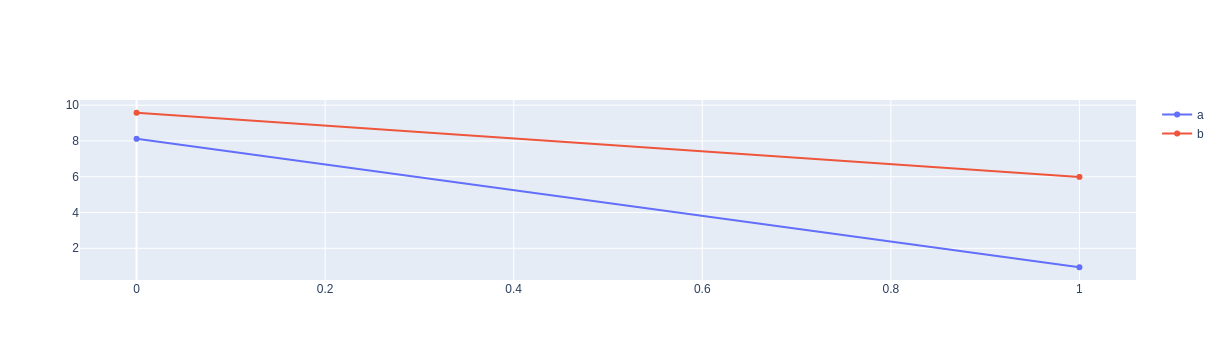

In [ ]:
learner = synth_learner(100,20)
l = L()
learner.fit_one_cycle(2, cbs=GradShowCallback(l))

In [ ]:
len(l)

200

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()